## Importing necessary libraries

In [1]:
import pandas as pd
import functions as f
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing First Dataset

In [2]:
df = pd.read_csv(
    "/Users/laurynas/Documents/DataScience/Projects/Data/lending-club/df_1.csv",
    low_memory=False,
)

In [3]:
df_1_train, df_1_test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
# df_1_train.to_csv("/Users/laurynas/Documents/DataScience/Projects/Data/lending-club/train_set_df_1.csv", index=False)
# df_1_test.to_csv("/Users/laurynas/Documents/DataScience/Projects/Data/lending-club/test_set_df_1.csv", index=False)

In [5]:
df_1 = df_1_train.copy()

## EDA Part-1 Accepted/Rejected Classification Task

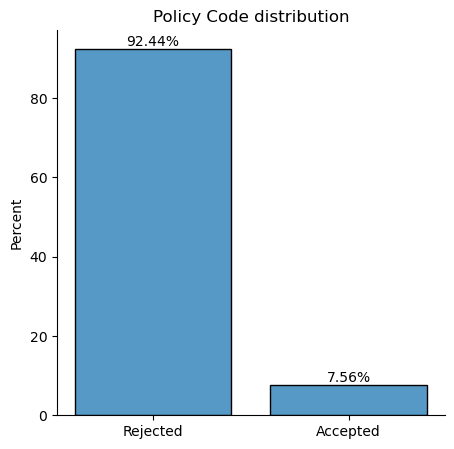

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df_1, x="policy_code", stat="percent", discrete=True, shrink=.8, ax=ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Rejected", "Accepted"])
ax.set_xlabel("")
ax.set_title("Policy Code distribution")
sns.despine()
for label in ax.containers:
    ax.bar_label(label, fmt="%.2f%%")

We can see that the first dataset is extremely imbalanced. In the modeling part I will calculate the weight of each class and use it in the model.

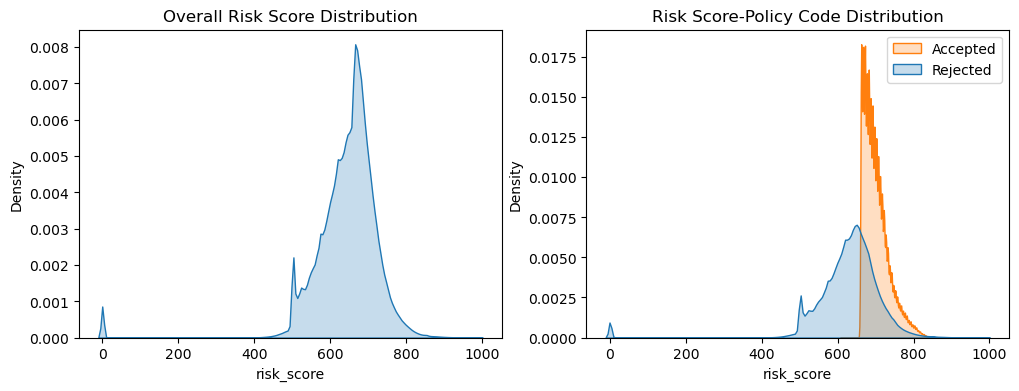

In [16]:
f.distribution_plot(
    df_1, col="risk_score", hue="policy_code", labels=["Accepted", "Rejected"]
)

There is a clear threshold for accepted loans risk score. At around 650 the loans which have a lower risk score are classified as accepted. This could mean that rsik score is a good predictor for accepted/rejected classification task. 

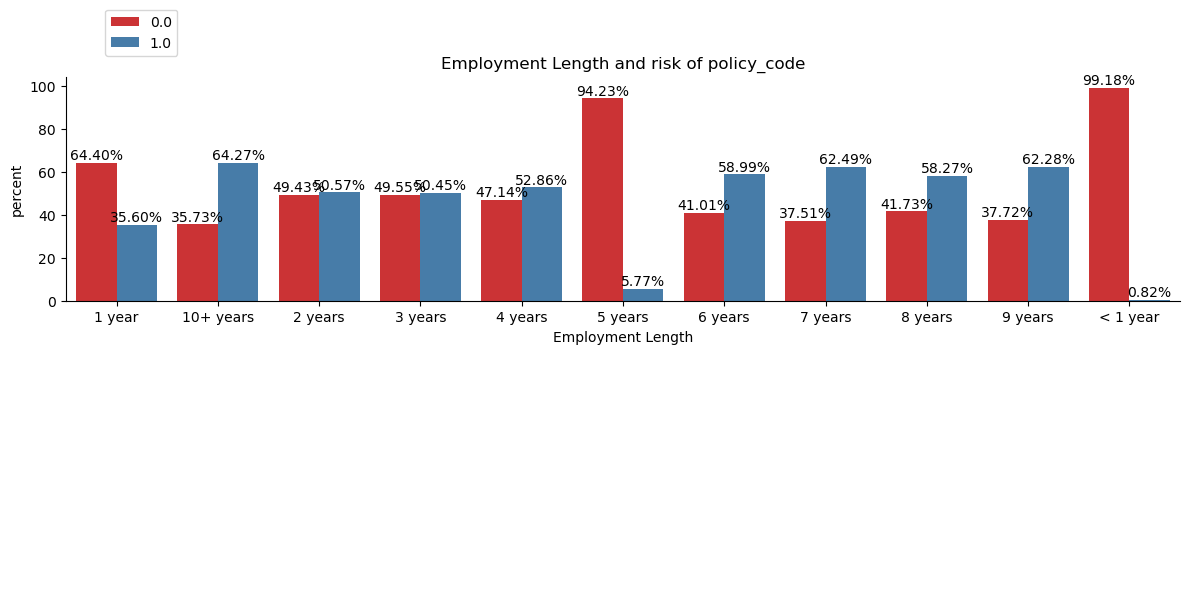

In [8]:
cols = [
    "employment_length"
]
hue = "policy_code"
palette = sns.color_palette("Set1", 2)
f.normalized_barplots(
    df_1,
    cols,
    hue,
    grid_x=1,
    grid_y=2,
    palette=palette,
    figsize=(12, 6),
    legend_loc=(0.1, 1.3),
)

From this barplot above we can see that the people who were employed less than year tend to have their loan application rejected. Also the same is true for people who have been employed for 5 years. But those who have been employed more then 5 years are more likely to have their loan apllications accepted.

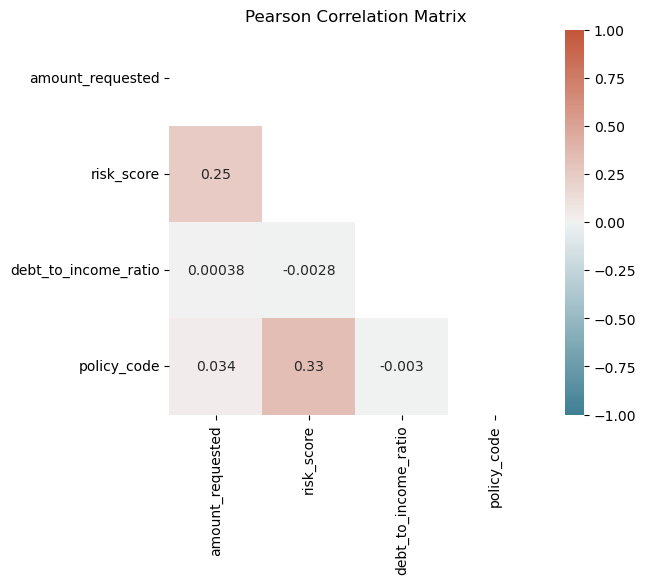

In [9]:
f.corr_heatmap(
    df_1,
    columns=["amount_requested", "risk_score", "debt_to_income_ratio", "policy_code"],
    annot=True,
    figsize=(6, 5),
)

There are no features that are highly correlated.

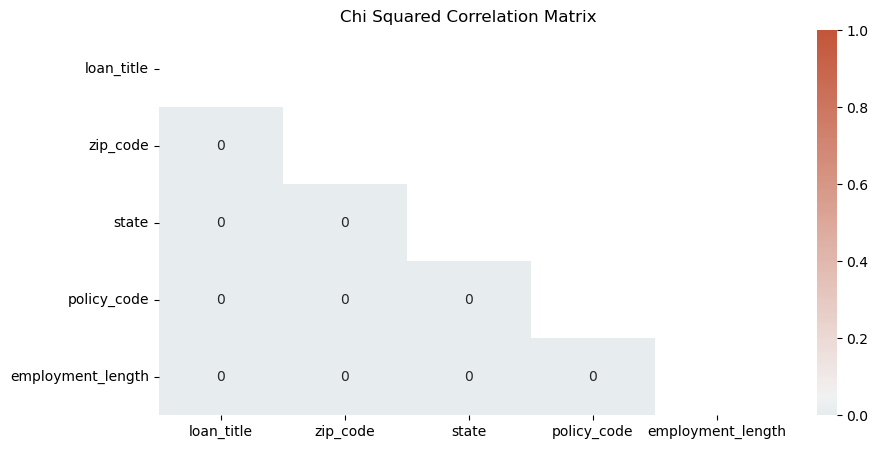

In [22]:
df_1["policy_code"] = df_1["policy_code"].astype("object")
selected_columns = ["loan_title", "zip_code", "state", "policy_code", "employment_length"]
f.corr_heatmap(df=df_1, columns=selected_columns, method="chi_squared", annot=True)

## Importing Second Dataset

In [2]:
df = pd.read_csv(
    "/Users/laurynas/Documents/DataScience/Projects/Data/lending-club/df_2.csv",
    low_memory=False,
)

In [3]:
df_2_train, df_2_test = train_test_split(df, test_size=0.2, random_state=42)

Exporting the train and test data for modelling.

In [34]:
# df_2_train.to_csv("/Users/laurynas/Documents/DataScience/Projects/Data/lending-club/train_set_df_2.csv", index=False)
# df_2_test.to_csv("/Users/laurynas/Documents/DataScience/Projects/Data/lending-club/test_set_df_2.csv", index=False)

Copying the dataset for analysis.

In [4]:
df_2 = df_2_train.copy()

## EDA Part-2 Loan Grade, Subgrade and Interest rate prediction task
### Loan grade
In lending platforms like Lending Club, loan grades and subgrades are assigned to categorize the creditworthiness of borrowers. The grades and subgrades typically range from "A" (considered lower risk) to "G" (higher risk). Each grade is further divided into subgrades.

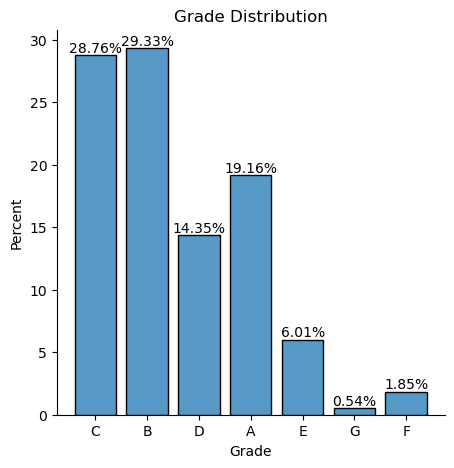

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df_2, x="grade", stat="percent", discrete=True, shrink=0.8, ax=ax)
ax.set_title("Grade Distribution")
ax.set_xlabel("Grade")
sns.despine()
for label in ax.containers:
    ax.bar_label(label, fmt="%.2f%%")

From this plot we can see that the grade classes are imbalanced.

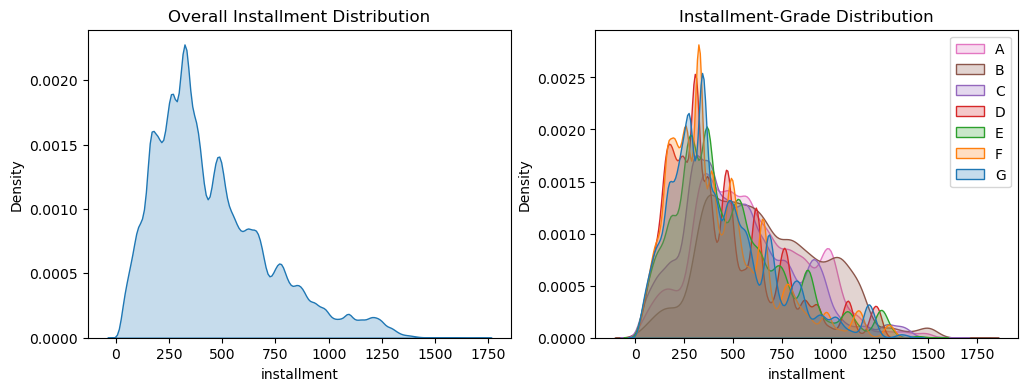

In [18]:
f.distribution_plot(
    df_2, col="installment", hue="grade", labels=["A", "B", "C", "D", "E", "F", "G"]
)

the different grades have different installment amount peaks. This could suggest that this feature could be a good predictor for the loan grade classification task.

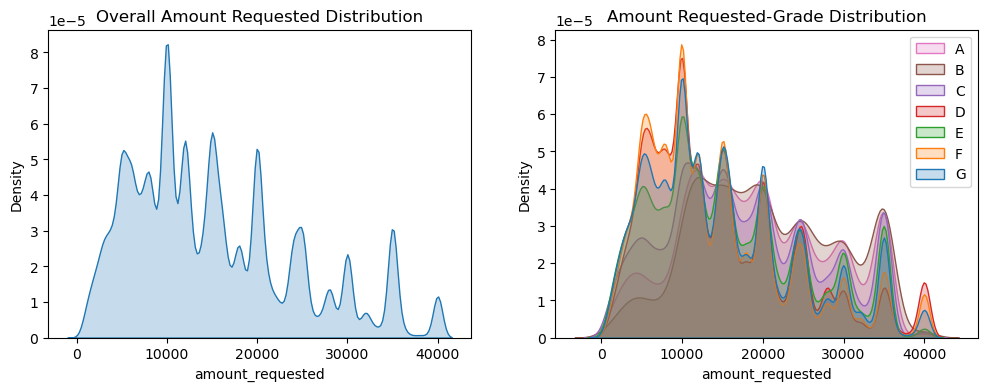

In [19]:
f.distribution_plot(
    df_2,
    col="amount_requested",
    hue="grade",
    labels=["A", "B", "C", "D", "E", "F", "G"],
)

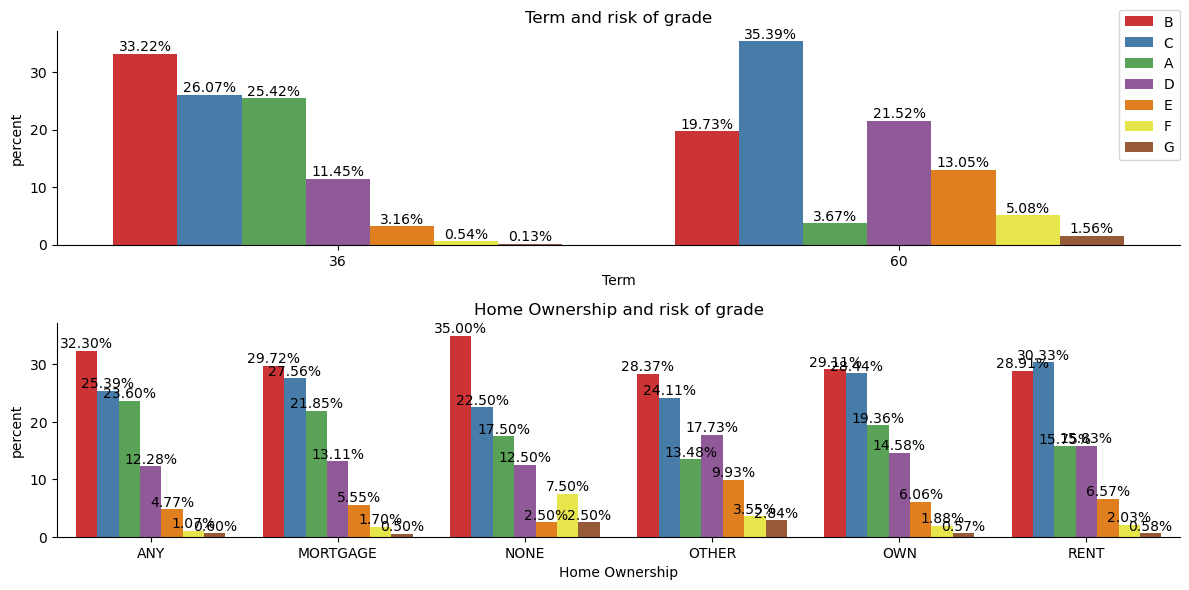

In [28]:
cols = [
    "term",
    "home_ownership"
]
hue = "grade"
palette = sns.color_palette("Set1", 7)
f.normalized_barplots(
    df_2,
    cols,
    hue,
    grid_x=1,
    grid_y=2,
    palette=palette,
    figsize=(12, 6),
    legend_loc=(1, 1.1),
)

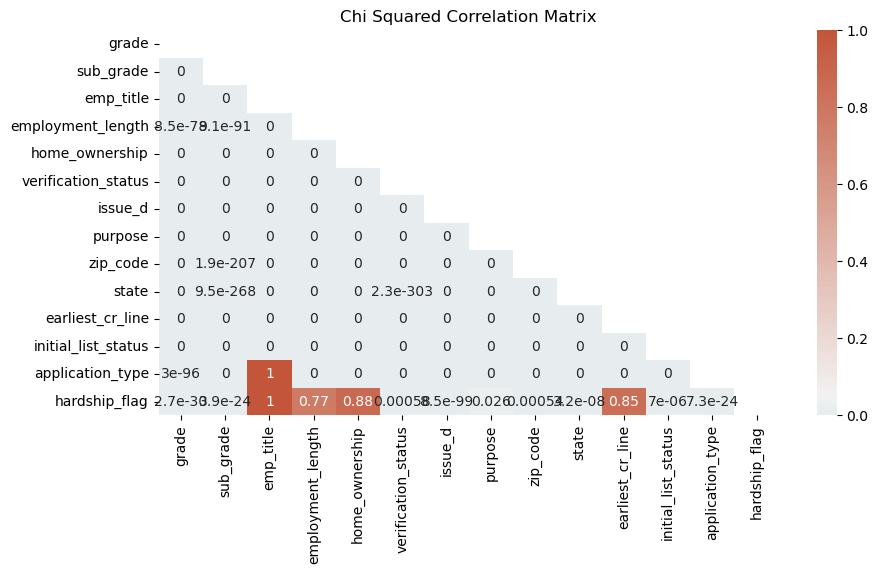

In [21]:
selected_columns = []
for column in df_2.columns:
    if df_2[column].dtype == "object":
        selected_columns.append(column)
f.corr_heatmap(df=df_2, columns=selected_columns, method="chi_squared", annot=True)

As we can see from the correlation heatmap above, the most majority of categorical features are correlated.

### Loan subgrade

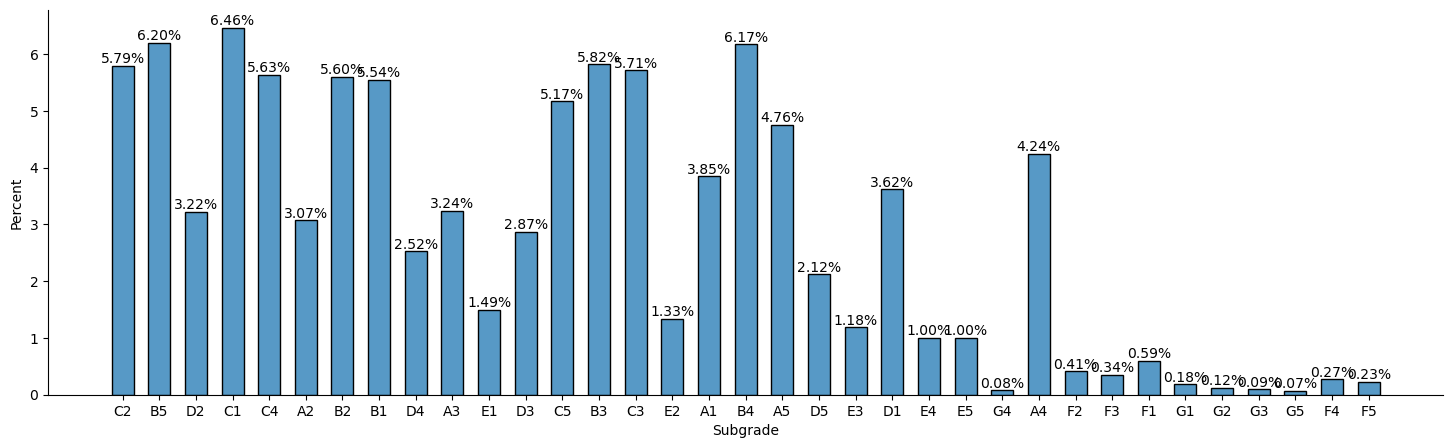

In [41]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.histplot(data=df_2, x="sub_grade", stat="percent", discrete=True, shrink=.6, ax=ax)
ax.set_title("Subgrade Distribution")
ax.set_xlabel("Subgrade")
sns.despine()
for label in ax.containers:
    ax.bar_label(label, fmt="%.2f%%")

Subgroup classes are also imbalanced in this dataset.

### Loan Interest rate

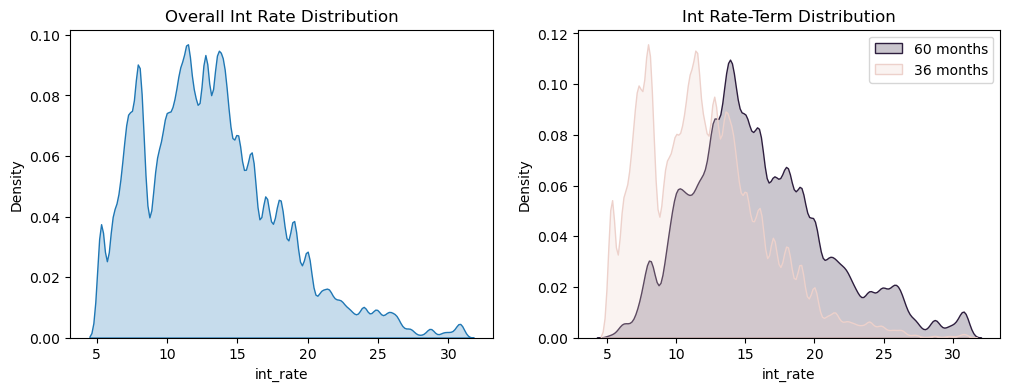

In [12]:
cols = ["term", "initial_list_status", "application_type"]
f.distribution_plot(
    df_2,
    col="int_rate",
    hue="term",
    labels=["60 months", "36 months"],
)

The distribution of interest rate has two peaks and is not normal. The term feature seems to be a good predictor for the interest rate because the interest rate tends to be higher for longer term loans, in this case 60 months.

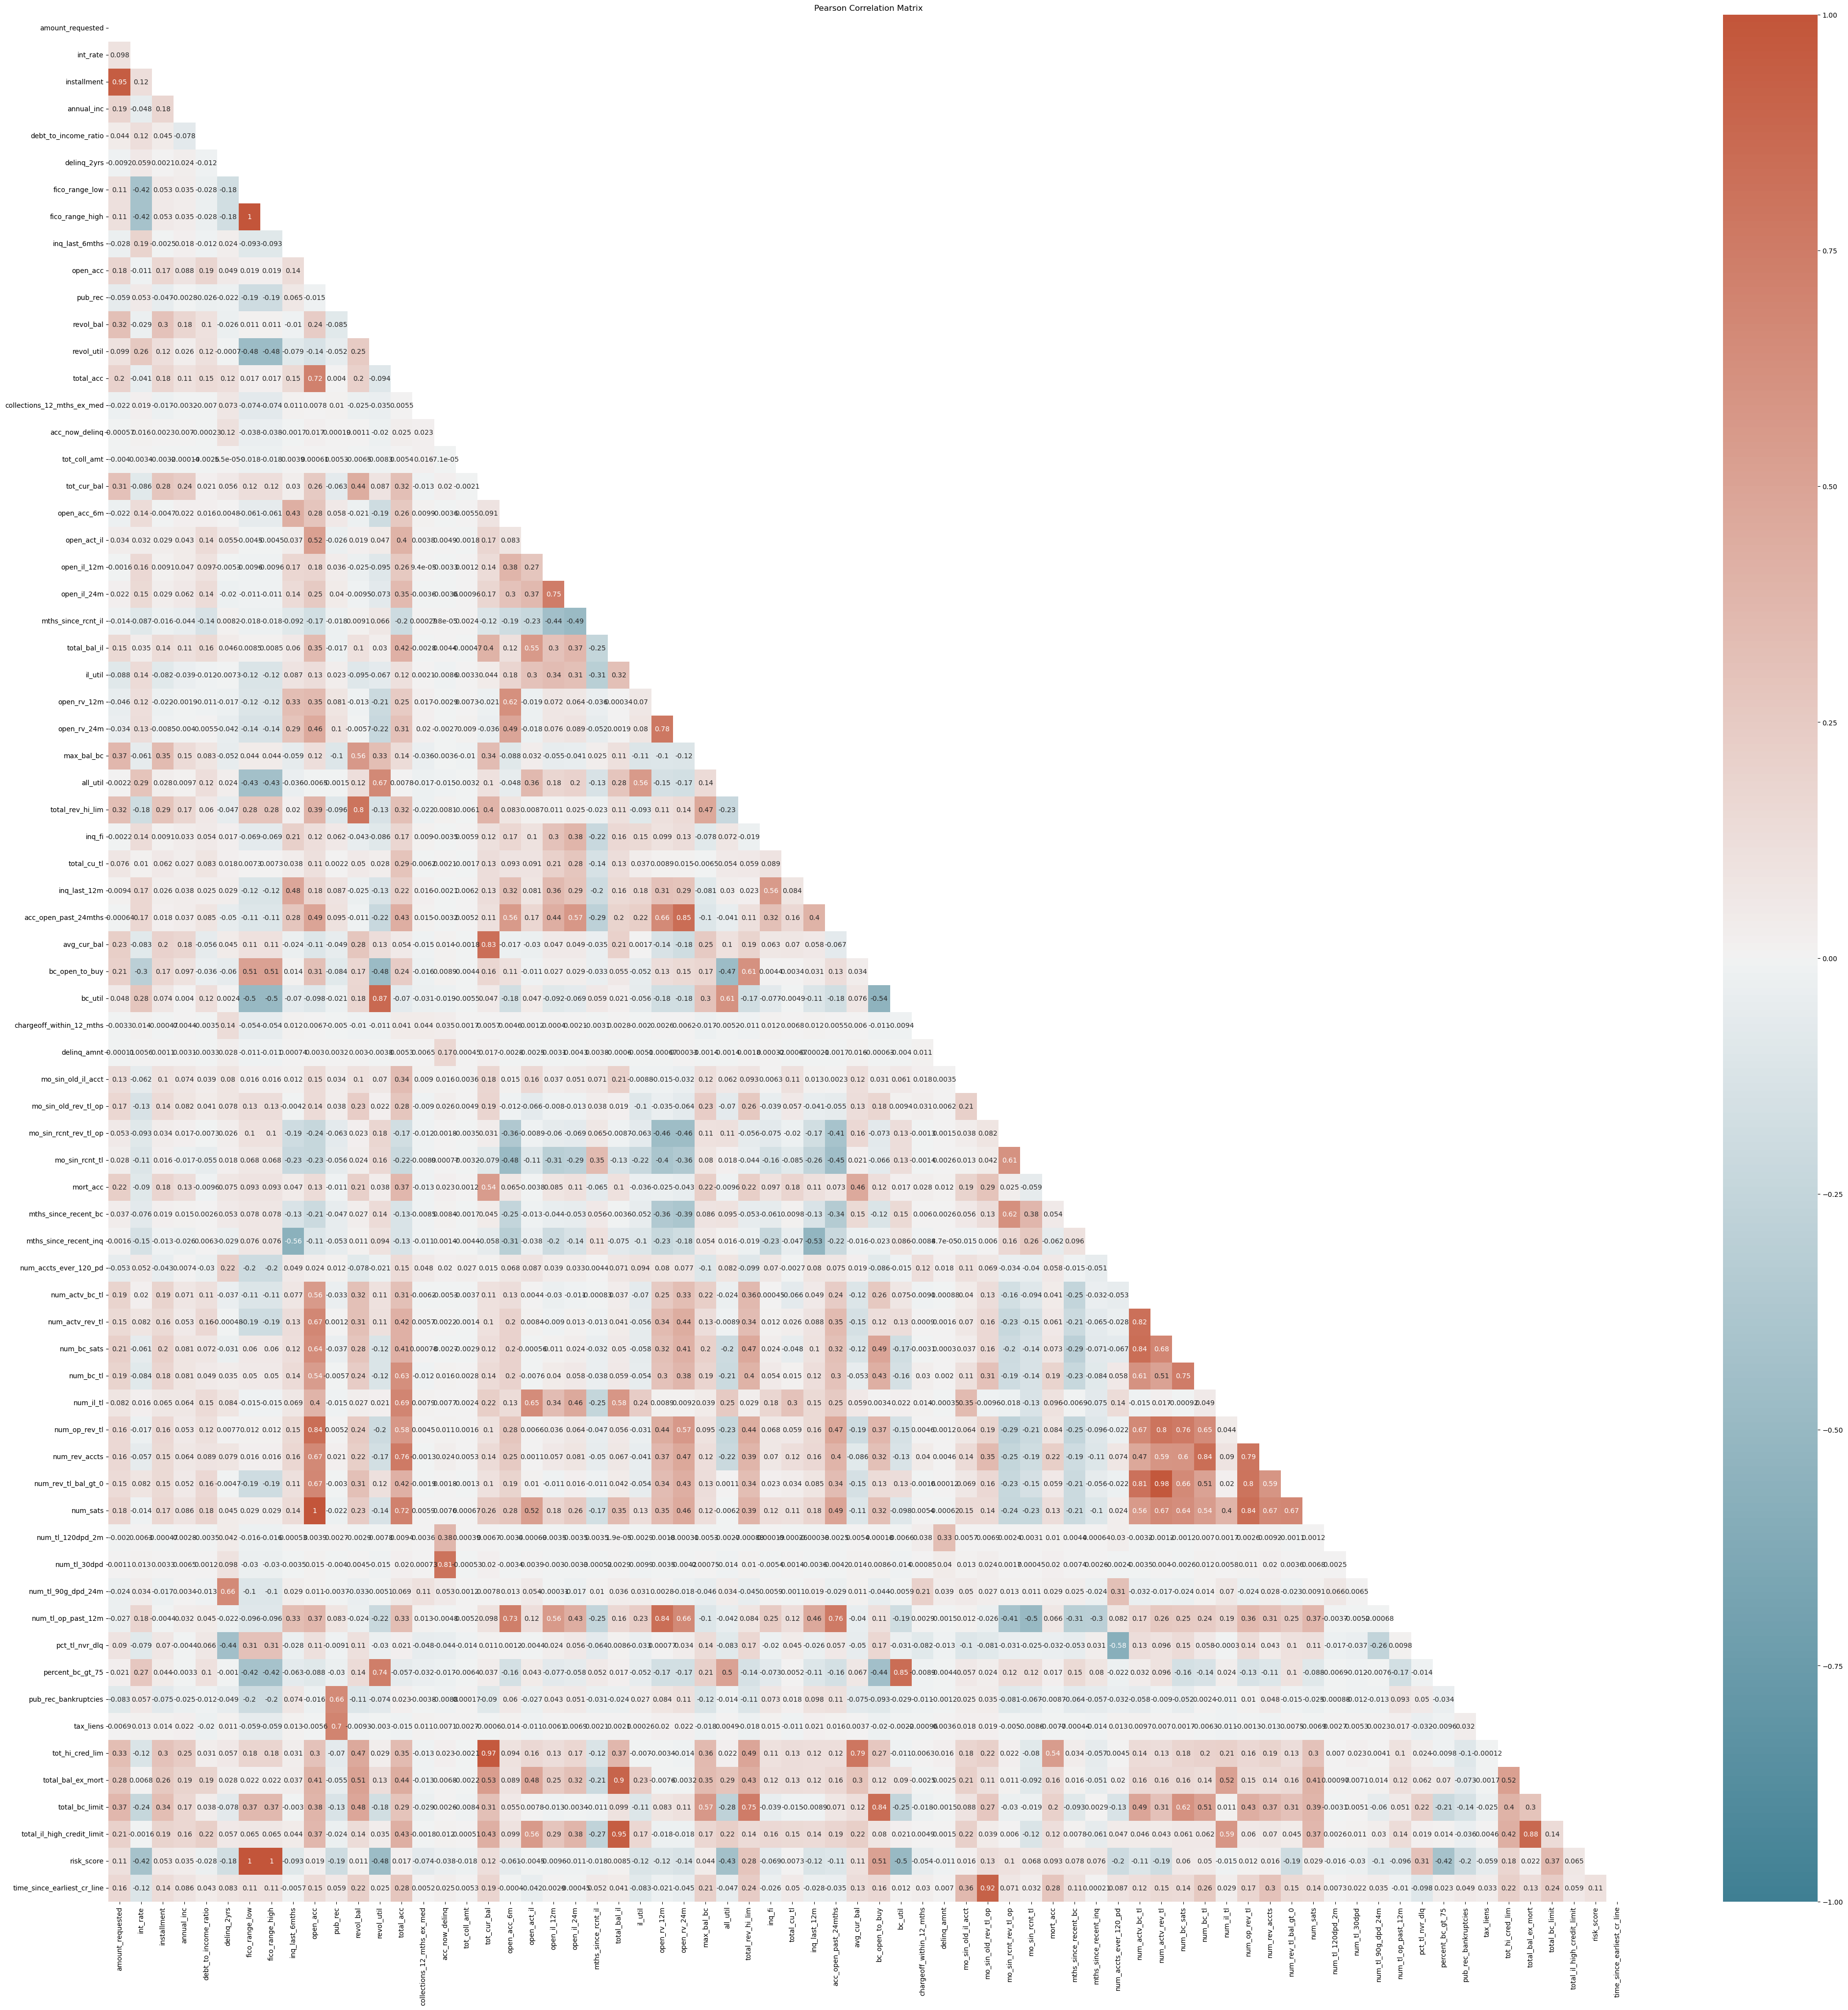

In [34]:
selected_columns = []
for column in df_2.columns:
    if df_2[column].dtype == "float":
        selected_columns.append(column)
    
f.corr_heatmap(df_2, columns=selected_columns, annot=True, figsize=(50, 50))

From this correlation heatmap we can see that there are a lot of features that are highly correlated. In the modeling part it could be a multicolinearity problem. Also we can see that the interest rate has a moderate correlation with the high and low fico range features. This could suggest that the fico range could be a good predictor for the interest rate prediction task. 